## <br/>
<a id='Header' style="font-size:40px; color:#1D2951; text-decoration:none; text-align:center;">
    <center><b>Email Text Classification</b></center>
</a>

<br/><br/>

<a id='Header' style="font-size:30px; color:#1D2951; text-decoration:none">
    <b> Table of Contents </b>
</a> 
<ul>
<li><a href="#libraries" style="font-size:15px; color:#1D2951">Importing Libraries</a></li>
<li><a href="#overview" style="font-size:15px; color:#1D2951">Dataset Overview</a></li>
<li><a href="#wrangling" style="font-size:15px; color:#1D2951">Data Exploratory</a></li>
<li><a href="#ML" style="font-size:15px; color:#1D2951">Apply a Model</a></li>

</ul>

<hr>

<a id='libraries' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Importing Libraries</b></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

%matplotlib inline

C:\Users\OsamaFouad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'


<a id='overview' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Dataset Overview</b></a>

In [2]:
df = pd.read_csv('smsspamcollection.tsv', sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


<a id='wrangling' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Data Exploratory</b></a>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
label      5572 non-null object
message    5572 non-null object
length     5572 non-null int64
punct      5572 non-null int64
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


There are no null rows, let's discover the total number of unique labels column.

In [4]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

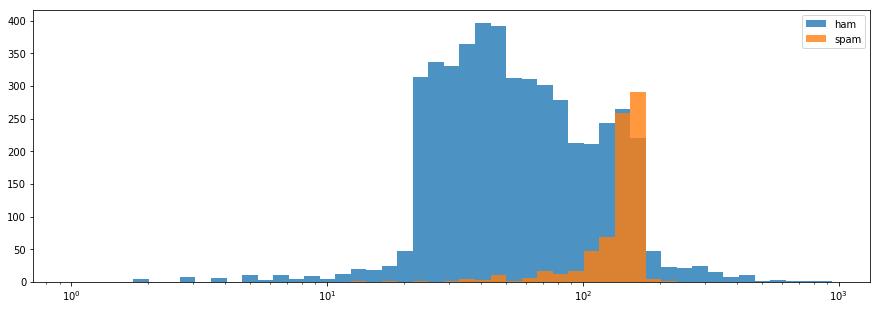

In [5]:
plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.gcf().set_size_inches(15, 5);
plt.show()

As shown in the figure, the total number of Ham is 6 times the Spam, which affects the process of training and testing dataset.

<a id='ML' style="font-size:30px; color:#1D2951; text-decoration:none"><b>Apply a Model</b></a>

In [6]:
# Selecting input and output data for training and testing.
X = df['message']  
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
# vectorizer = TfidfVectorizer()
# X_train_tfidf = vectorizer.fit_transform(X_train)

In [8]:
# clf = LinearSVC()
# clf.fit(X_train_tfidf,y_train)

In [9]:
# or you could use Pipeline instead.
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),])


text_clf.fit(X_train, y_train)  
predictions = text_clf.predict(X_test)

C:\Users\OsamaFouad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:209: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(joblib_version) < '0.12':


In [10]:
from sklearn import metrics
print(f"Confusion Matrix is: \n {metrics.confusion_matrix(y_test,predictions)}")

Confusion Matrix is: 
 [[1586    7]
 [  12  234]]


In [11]:
print(metrics.classification_report(y_test,predictions)) 

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1593
        spam       0.97      0.95      0.96       246

   micro avg       0.99      0.99      0.99      1839
   macro avg       0.98      0.97      0.98      1839
weighted avg       0.99      0.99      0.99      1839



In [12]:
print(f"The accuracy of the model is: {metrics.accuracy_score(y_test,predictions)}")

The accuracy of the model is: 0.989668297988037
